# Time-series Momentum

Time series momentum tries to exploit the same anomly and idea behind cross-sectional momentum. The idea is if a securties is tending in a direction (up or down) in past it is assumed to that it will continue moving in the same direction (up or down) even in near the future. For the same reason it is also called as a trend following strategy. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [6]:
df = pd.read_csv("datasets/sp500_price.csv", index_col=[0], parse_dates=[0])
df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XLNX,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2018-01-02 05:00:00+00:00,67.605,52.76,106.12,172.26,96.71,94.04,192.43,58.23,153.83,177.69,...,164.29,47.87,67.87,29.375,68.070,81.61,124.08,103.71,50.68,71.79
2018-01-03 05:00:00+00:00,69.340,52.12,107.04,172.18,99.94,94.42,195.77,58.36,154.50,180.98,...,162.45,47.49,69.23,29.330,68.870,81.53,124.93,105.74,50.64,72.09
2018-01-04 05:00:00+00:00,68.805,52.45,111.00,173.02,99.36,94.17,199.30,58.26,156.34,183.21,...,163.39,47.11,70.49,29.690,69.345,82.35,124.73,107.82,50.83,72.54
2018-01-05 05:00:00+00:00,69.890,52.65,112.17,174.96,99.36,95.33,202.28,58.99,157.66,185.35,...,164.48,46.78,74.16,29.910,69.230,82.84,125.98,109.60,50.86,73.34
2018-01-08 05:00:00+00:00,70.060,52.11,111.37,174.34,97.77,96.90,207.80,58.83,158.90,185.02,...,162.24,47.15,74.63,30.260,69.460,82.96,126.15,110.63,50.62,74.25


We will use the Apple Inc. stock price to understand the intuition behind the time-series momentum strategy. 

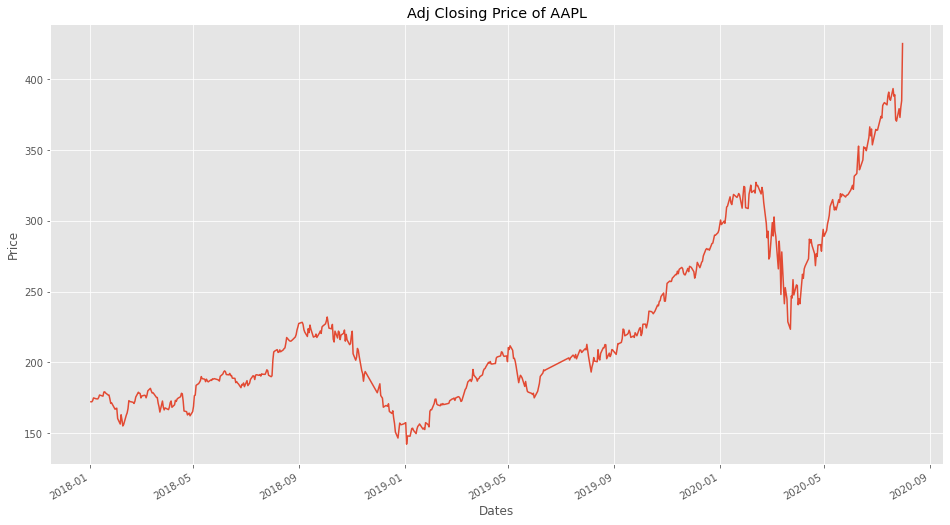

In [18]:
aapl = df['AAPL']
aapl.plot(figsize=(16,9), title="Adj Closing Price of AAPL", xlabel='Dates', ylabel='Price');

## SMA cross-over strategy
This involves computing two simple moving averages of different window length and trading signals are generated when the moving averages cross each other. The one of the simple moving average is of shorter time length then the other, which is called the `fast_SMA` and the other is called `slow_SMA`.

$$SMA_k = \frac{1}{k} \sum_{i=n-k+1}^{n} p_i$$
where, <br>
$p_i$ = price at the $i^{th}$ observation. <br>
$n$ = total number of observation <br>
$k$ = window size


### Trading Signals
* `fast_SMA` crosses `slow_SMA` from bottom generates a buy signal.
* `fast_SMA` crosses `slow_SMA` from top generates a sell signal.


In [13]:
# compute moving averages
fast_window = 20
slow_window = 50
aapl_df = aapl.to_frame()
aapl_df['fast_SMA'] = aapl_df['AAPL'].rolling(window=fast_window).mean()
aapl_df['slow_SMA'] = aapl_df['AAPL'].rolling(window=slow_window).mean()
aapl_df.tail()

,AAPL,fast_mavg,slow_mavg
2020-07-27 04:00:00+00:00,379.215,378.646245,352.307678
2020-07-28 04:00:00+00:00,373.040,379.198245,353.613678
2020-07-29 04:00:00+00:00,380.270,379.981745,354.921278
2020-07-30 04:00:00+00:00,384.880,381.025245,356.358678
2020-07-31 04:00:00+00:00,425.190,384.078745,358.479278


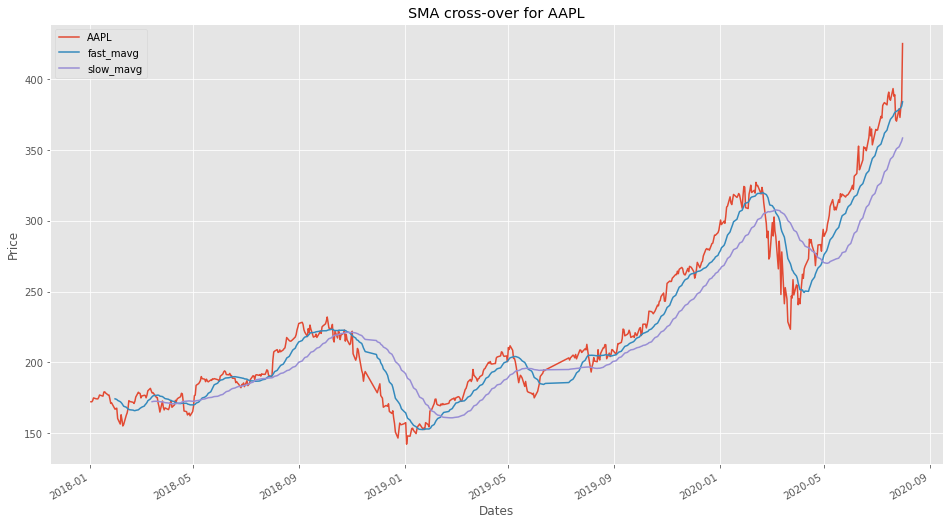

In [19]:
aapl_df.plot(figsize=(16,9), title="SMA cross-over for AAPL", xlabel='Dates', ylabel='Price');